In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_itm_cat = pd.read_csv('00-Input/item_categories.csv')
df_itm = pd.read_csv('00-Input/items.csv')
df_sh = pd.read_csv('00-Input/shops.csv')
df_tr = pd.read_csv('00-Input/sales_train.csv')
df_te = pd.read_csv('00-Input/test.csv')

## Aim / Goal -> Forcast total amount of products sold for the next month/months

### STEP-1: EDA
- Top 5 records
- Data Types / Info
- Shape Of Data
- Missing Values
- NULL values
- Describe
- Correlation

### STEP-2: Combined data into one dataframe
- Check for duplicates
- Cleaning

### STEP-3: visualization
- Yearly sales
- Monthly sales
- Monthly items count
- Weekly sales

### STEP-4: Outliers
- Identifying
- Handling

### STEP-5: Machine learning
- Data preparation
- Identify Methods for future sales forcasting

In [3]:
df_sh

,city,shop_name,shop_id
0,Yakutsk,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,Yakutsk,"! Yakutsk TC ""Central"" Franc",1
2,Adygea Republic,"Adygea TC ""Mega""",2
3,Balashikha,"Balashikha TRC ""October-Kinomir""",3
4,Volzhsky,"Volzhsky mall ""Volga Mall""",4
5,Vologda,"Vologda SEC ""Marmalade""",5
6,Voronezh,"Voronezh (Plekhanovskaya, 13)",6
7,Voronezh,"Voronezh SEC ""Maksimir""",7
8,Voronezh,"Voronezh shopping center City Park ""Castle""",8
9,Shop Online,Itinerant trade,9


In [4]:
# Filter pandas DataFrame by substring critera
df_sh[df_sh['shop_name'].str.contains('! ', regex=False)]

,city,shop_name,shop_id
0,Yakutsk,"! Yakutsk Ordzhonikidze, 56 Franc",0
1,Yakutsk,"! Yakutsk TC ""Central"" Franc",1


In [5]:
# getting rid of "!" before shop_names
df_sh['shop_name'] = df_sh['shop_name'].map(lambda x: x.split('!')[1] if x.startswith('!') else x)

In [7]:
df_sh.city.value_counts()

Moscow             13
Yakutsk             4
Tyumen              3
Shop Online         3
Voronezh            3
Rostov-on-Don       3
Nizhny Novgorod     2
Krasnoyarsk         2
Novosibirsk         2
St. Petersburg      2
Kazan               2
Zhukovsky           2
Ufa                 2
Samara              2
Mytishchi           1
Yaroslavl           1
Adygea Republic     1
Czech Republic      1
Tomsk               1
Kaluga              1
Balashikha          1
Kursk               1
Vologda             1
Omsk                1
Kolomna             1
Sergiev Posad       1
Khimki              1
Surgut              1
Volzhsky            1
Name: city, dtype: int64

In [9]:
# EDA 

def EDA(df):
    print(" ")
    print("----------TOP 5 RECORDS--------")
    print(df.head(5))
    print(" ")
    print("----------Data Types-----------")
    print(df.dtypes)
    print(" ")
    print("----------INFO-----------------")
    print(df.info())
    print(" ")
    print("-----Data Shape-------------")
    print(df.shape)
    print(" ")
    print("-------Missing Values----------")
    print(df.isnull().sum())
    print(" ")
    print("-------NULL values-------------")
    print(df.isna().sum())
    
    

In [10]:

print("*************** Item Categories ***************")
EDA(df_itm_cat)


*************** Item Categories ***************
 
----------TOP 5 RECORDS--------
                     item_cat          item_category_name  item_category_id
0  PC - Headsets / Headphones  PC - Headsets / Headphones                 0
1                 Accessories           Accessories - PS2                 1
2                 Accessories           Accessories - PS3                 2
3                 Accessories           Accessories - PS4                 3
4                 Accessories           Accessories - PSP                 4
 
----------Data Types-----------
item_cat              object
item_category_name    object
item_category_id       int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   item_cat            84 non-null     object
 1   item_category_name  84 non-null     object

In [11]:
df_itm_cat.describe()

,item_category_id
count,84.000000
mean,41.500000
std,24.392622
min,0.000000
25%,20.750000
50%,41.500000
75%,62.250000
max,83.000000


In [12]:
print("*************** Items ***************")
EDA(df_itm)

*************** Items ***************
 
----------TOP 5 RECORDS--------
                                           item_name  item_id  \
0                       ! POWER IN glamor (PLAST.) D        0   
1  ! ABBYY FineReader 12 Professional Edition Ful...        1   
2                           *** In the glory (UNV) D        2   
3                             *** BLUE WAVE (Univ) D        3   
4                                  *** BOX (GLASS) D        4   

   item_category_id  
0                40  
1                76  
2                40  
3                40  
4                40  
 
----------Data Types-----------
item_name           object
item_id              int64
item_category_id     int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22170 entries, 0 to 22169
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   item_name         22170 non-null  obj

In [13]:
print("*************** Shops ***************")
EDA(df_sh)

*************** Shops ***************
 
----------TOP 5 RECORDS--------
              city                         shop_name  shop_id
0          Yakutsk   Yakutsk Ordzhonikidze, 56 Franc        0
1          Yakutsk        Yakutsk TC "Central" Franc        1
2  Adygea Republic                  Adygea TC "Mega"        2
3       Balashikha  Balashikha TRC "October-Kinomir"        3
4         Volzhsky        Volzhsky mall "Volga Mall"        4
 
----------Data Types-----------
city         object
shop_name    object
shop_id       int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   city       60 non-null     object
 1   shop_name  60 non-null     object
 2   shop_id    60 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ KB
None
 
-----Data Shape-------------
(60, 3)
 
-------Missing Values

In [14]:
print("*************** Training Sales Data ***************")
EDA(df_tr)

*************** Training Sales Data ***************
 
----------TOP 5 RECORDS--------
         date  date_block_num  shop_id  item_id  item_price  item_cnt_day
0  02.01.2013               0       59    22154      999.00           1.0
1  03.01.2013               0       25     2552      899.00           1.0
2  05.01.2013               0       25     2552      899.00          -1.0
3  06.01.2013               0       25     2554     1709.05           1.0
4  15.01.2013               0       25     2555     1099.00           1.0
 
----------Data Types-----------
date               object
date_block_num      int64
shop_id             int64
item_id             int64
item_price        float64
item_cnt_day      float64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
 #   Column          Dtype  
---  ------          -----  
 0   date            object 
 1   date_block_num  int64  
 2  

In [15]:
print("*************** Test data ***************")
EDA(df_te)

*************** Test data ***************
 
----------TOP 5 RECORDS--------
   ID  shop_id  item_id
0   0        5     5037
1   1        5     5320
2   2        5     5233
3   3        5     5232
4   4        5     5268
 
----------Data Types-----------
ID         int64
shop_id    int64
item_id    int64
dtype: object
 
----------INFO-----------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214200 entries, 0 to 214199
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   ID       214200 non-null  int64
 1   shop_id  214200 non-null  int64
 2   item_id  214200 non-null  int64
dtypes: int64(3)
memory usage: 4.9 MB
None
 
-----Data Shape-------------
(214200, 3)
 
-------Missing Values----------
ID         0
shop_id    0
item_id    0
dtype: int64
 
-------NULL values-------------
ID         0
shop_id    0
item_id    0
dtype: int64


In [16]:
# Combining sales_train with item_categories
#df_itm_cat, df_itm, #df_sh, #df_tr
df_tr_itm = pd.merge(left=df_tr, right=df_itm, left_on='item_id', right_on='item_id')
df_tr_itm

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37
1,23.01.2013,0,24,22154,999.0,1.0,Scene 2012 (BD),37
2,20.01.2013,0,27,22154,999.0,1.0,Scene 2012 (BD),37
3,02.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37
4,03.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37
...,...,...,...,...,...,...,...,...
2935844,17.10.2015,33,25,8428,249.0,1.0,ACh vaudeville Vaudeville (rem),40
2935845,01.10.2015,33,25,7903,12198.0,1.0,XBOX 360 S 250GB CONSOLE / KINECT BUNDLE KUNG ...,15
2935846,29.10.2015,33,25,7610,2890.0,1.0,WARHAMMER ACCESSORIES: Khorne Dice art. 65-13,64
2935847,22.10.2015,33,25,7635,2100.0,1.0,WARHAMMER MINIATURES: Dark Elf Doomfire Warloc...,64


In [17]:
df_tr_itm_cat = pd.merge(left=df_tr_itm, right=df_itm_cat, left_on='item_category_id', right_on='item_category_id')
df_tr_itm_cat

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_cat,item_category_name
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray
1,23.01.2013,0,24,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray
2,20.01.2013,0,27,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray
3,02.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray
4,03.01.2013,0,25,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray
...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Map Windows paying 250 rubles [Digital Version],36,Payment cards,Payment card - Windows (figure)
2935845,21.09.2015,32,55,13091,1000.0,1.0,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure)
2935846,16.09.2015,32,55,13094,2500.0,1.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure)
2935847,22.09.2015,32,55,13094,2500.0,2.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure)


In [18]:
df_tr_data = pd.merge(left=df_tr_itm_cat, right=df_sh, left_on='shop_id', right_on='shop_id')
df_tr_data

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_name,item_category_id,item_cat,item_category_name,city,shop_name
0,02.01.2013,0,59,22154,999.0,1.0,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,Yaroslavl,"Yaroslavl shopping center ""Altair"""
1,26.04.2013,3,59,944,150.0,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Yaroslavl,"Yaroslavl shopping center ""Altair"""
2,26.06.2013,5,59,944,199.5,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Yaroslavl,"Yaroslavl shopping center ""Altair"""
3,20.07.2013,6,59,944,199.5,1.0,2012 (BD),37,Movie,Movie - Blu-Ray,Yaroslavl,"Yaroslavl shopping center ""Altair"""
4,14.09.2013,8,59,944,299.0,2.0,2012 (BD),37,Movie,Movie - Blu-Ray,Yaroslavl,"Yaroslavl shopping center ""Altair"""
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,55,13093,250.0,1.0,Map Windows paying 250 rubles [Digital Version],36,Payment cards,Payment card - Windows (figure),Shop Online,Digital storage 1C-line
2935845,21.09.2015,32,55,13091,1000.0,1.0,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),Shop Online,Digital storage 1C-line
2935846,16.09.2015,32,55,13094,2500.0,1.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),Shop Online,Digital storage 1C-line
2935847,22.09.2015,32,55,13094,2500.0,2.0,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),Shop Online,Digital storage 1C-line


In [19]:
# rearranging dataframe columns
df_tr_data = df_tr_data[['date', 'date_block_num', 'city', 'shop_id', 'shop_name', 'item_id', 'item_name', 'item_category_id', 'item_cat', 'item_category_name', 'item_price', 'item_cnt_day']]
df_tr_data


,date,date_block_num,city,shop_id,shop_name,item_id,item_name,item_category_id,item_cat,item_category_name,item_price,item_cnt_day
0,02.01.2013,0,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,999.0,1.0
1,26.04.2013,3,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,150.0,1.0
2,26.06.2013,5,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,199.5,1.0
3,20.07.2013,6,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,199.5,1.0
4,14.09.2013,8,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,299.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,22.10.2015,33,Shop Online,55,Digital storage 1C-line,13093,Map Windows paying 250 rubles [Digital Version],36,Payment cards,Payment card - Windows (figure),250.0,1.0
2935845,21.09.2015,32,Shop Online,55,Digital storage 1C-line,13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),1000.0,1.0
2935846,16.09.2015,32,Shop Online,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),2500.0,1.0
2935847,22.09.2015,32,Shop Online,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),2500.0,2.0


In [20]:
# Checking for empty / null values
# df_tr_data.isna().sum() OR
df_tr_data.isnull().sum()

date                  0
date_block_num        0
city                  0
shop_id               0
shop_name             0
item_id               0
item_name             0
item_category_id      0
item_cat              0
item_category_name    0
item_price            0
item_cnt_day          0
dtype: int64

In [21]:
df_tr_data.dtypes

date                   object
date_block_num          int64
city                   object
shop_id                 int64
shop_name              object
item_id                 int64
item_name              object
item_category_id        int64
item_cat               object
item_category_name     object
item_price            float64
item_cnt_day          float64
dtype: object

In [22]:
# Converting the date into datetimelike format
df_tr_data['date'] = pd.to_datetime(df_tr_data['date'], errors='coerce')

In [23]:
# Revenue for product sold
df_tr_data['revenue'] = df_tr_data.item_price * df_tr_data.item_cnt_day
df_tr_data

,date,date_block_num,city,shop_id,shop_name,item_id,item_name,item_category_id,item_cat,item_category_name,item_price,item_cnt_day,revenue
0,2013-02-01,0,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,999.0,1.0,999.0
1,2013-04-26,3,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,150.0,1.0,150.0
2,2013-06-26,5,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,199.5,1.0,199.5
3,2013-07-20,6,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,199.5,1.0,199.5
4,2013-09-14,8,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",944,2012 (BD),37,Movie,Movie - Blu-Ray,299.0,2.0,598.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2935844,2015-10-22,33,Shop Online,55,Digital storage 1C-line,13093,Map Windows paying 250 rubles [Digital Version],36,Payment cards,Payment card - Windows (figure),250.0,1.0,250.0
2935845,2015-09-21,32,Shop Online,55,Digital storage 1C-line,13091,Map Windows Payment: 1000 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),1000.0,1.0,1000.0
2935846,2015-09-16,32,Shop Online,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),2500.0,1.0,2500.0
2935847,2015-09-22,32,Shop Online,55,Digital storage 1C-line,13094,Map Windows Payment: 2500 rubles [Digital Vers...,36,Payment cards,Payment card - Windows (figure),2500.0,2.0,5000.0


In [38]:
# Get weekday, month and year from 'dteday' column
df_tr_data.loc[:,'day'] = df_tr_data.date.dt.day

df_tr_data.loc[:,'WEEKDAY'] = df_tr_data.date.dt.dayofweek
df_tr_data.loc[:,'weekday'] = df_tr_data.date.dt.day_name()

df_tr_data.loc[:,'MONTH'] = df_tr_data.date.dt.month
df_tr_data.loc[:,'month'] = df_tr_data.date.dt.month_name()
df_tr_data.loc[:,'year'] = df_tr_data.date.dt.year


In [39]:
df_tr_data = df_tr_data.sort_values(by=['date_block_num'], ascending = True)
df_tr_data

,date,date_block_num,city,shop_id,shop_name,item_id,item_name,item_category_id,item_cat,item_category_name,item_price,item_cnt_day,revenue,day,weekday,month,year,MONTH,WEEKDAY
0,2013-02-01,0,Yaroslavl,59,"Yaroslavl shopping center ""Altair""",22154,Scene 2012 (BD),37,Movie,Movie - Blu-Ray,999.0,1.0,999.0,1,Friday,February,2013,2,4
1372464,2013-01-23,0,Yakutsk,0,"Yakutsk Ordzhonikidze, 56 Franc",6488,"Pets Sims 3. [PC, Russian version]",28,Games,Games PC - Additional publications,553.0,1.0,553.0,23,Wednesday,January,2013,1,2
1372463,2013-12-01,0,Yakutsk,0,"Yakutsk Ordzhonikidze, 56 Franc",6488,"Pets Sims 3. [PC, Russian version]",28,Games,Games PC - Additional publications,553.0,1.0,553.0,1,Sunday,December,2013,12,6
1372462,2013-10-01,0,Yakutsk,0,"Yakutsk Ordzhonikidze, 56 Franc",6488,"Pets Sims 3. [PC, Russian version]",28,Games,Games PC - Additional publications,553.0,1.0,553.0,1,Tuesday,October,2013,10,1
1372461,2013-05-01,0,Yakutsk,0,"Yakutsk Ordzhonikidze, 56 Franc",6488,"Pets Sims 3. [PC, Russian version]",28,Games,Games PC - Additional publications,553.0,1.0,553.0,1,Wednesday,May,2013,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179852,2015-10-28,33,Rostov-on-Don,41,"RostovNaDonu TC ""Mega""",17948,ROMEO AND JULIET (BD),37,Movie,Movie - Blu-Ray,58.0,1.0,58.0,28,Wednesday,October,2015,10,2
2179986,2015-10-18,33,Rostov-on-Don,41,"RostovNaDonu TC ""Mega""",16639,ISLAND WB (BD),37,Movie,Movie - Blu-Ray,299.0,1.0,299.0,18,Sunday,October,2015,10,6
2713161,2015-06-10,33,Moscow,26,"Moscow shopping mall ""area"" (Belyaevo)",6092,"Rayman Origins (Essentials) [PS3, Russian docu...",19,Games,Games - PS3,1199.0,1.0,1199.0,10,Wednesday,June,2015,6,2
2713388,2015-02-10,33,Moscow,26,"Moscow shopping mall ""area"" (Belyaevo)",1847,"Battlefield 4 (Essentials) [PS3, Russian version]",19,Games,Games - PS3,1199.0,1.0,1199.0,10,Tuesday,February,2015,2,1


In [40]:
df_tr_data.dtypes

date                  datetime64[ns]
date_block_num                 int64
city                          object
shop_id                        int64
shop_name                     object
item_id                        int64
item_name                     object
item_category_id               int64
item_cat                      object
item_category_name            object
item_price                   float64
item_cnt_day                 float64
revenue                      float64
day                            int64
weekday                       object
month                         object
year                           int64
MONTH                          int64
WEEKDAY                        int64
dtype: object

<AxesSubplot:xlabel='date_block_num'>

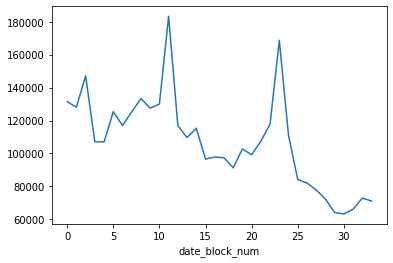

In [28]:
sales_by_month = df_tr_data.groupby(['date_block_num'])['item_cnt_day'].sum()
sales_by_month.plot()

<AxesSubplot:xlabel='date_block_num'>

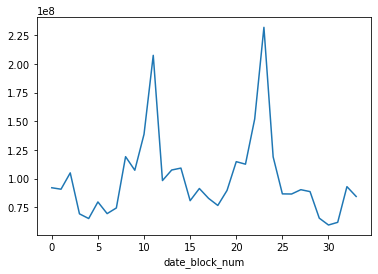

In [29]:
sales_by_months = df_tr_data.groupby(['date_block_num'])['revenue'].sum()
sales_by_months.plot()

In [30]:
df_tr_data.groupby(['year', 'item_cat', 'item_category_name']).size()

year  item_cat             item_category_name             
2013  Accessories          Accessories - PS2                      2
                           Accessories - PS3                  10521
                           Accessories - PS4                   4653
                           Accessories - PSP                   1814
                           Accessories - PSVita                4195
                                                              ...  
2015  Program              Programs - Educational (figure)      640
      System Tools         System Tools                        4368
      Tickets (digits)     Tickets (digits)                     509
      Utilities - Tickets  Utilities - Tickets                 1325
      batteries            batteries                           2202
Length: 216, dtype: int64

In [31]:
# Top catogieries for the sold items

#df_tr_data.groupby('year').item_category_name.value_counts()
df_tr_data[df_tr_data['year']==2013].item_category_name.value_counts()

Movie - DVD                       287748
Games PC - Standard Edition       176485
Music - CD of local production    150684
Games - PS3                       101100
Movie - Blu-Ray                    81777
                                   ...  
Books - Travel Guides                  3
PC - Headsets / Headphones             3
Books - Fiction                        2
Accessories - PS2                      2
Game consoles - PS2                    1
Name: item_category_name, Length: 70, dtype: int64

In [ ]:
#plt.plot(MONTHS, dfp[dfp.year==2013].item_cnt_month, '-o', color='steelblue', linewidth=LINEWIDTH, alpha=ALPHA,label='2013')

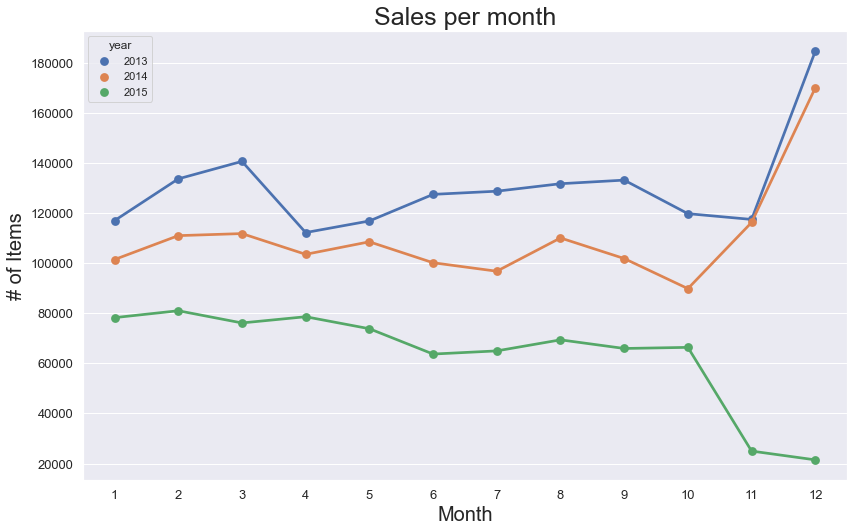

In [32]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data.groupby(['MONTH', 'year'])['item_cnt_day'].sum().reset_index(), x='MONTH', y='item_cnt_day', hue='year')

plt.title('Sales per month',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.tick_params(labelsize=13)

In [33]:
#df1 = df_tr_data.groupby(['MONTH', 'year']).item_price.sum().reset_index()
#sns.lineplot(data=df1, x='MONTH', y='item_price', hue='year', sort=False)

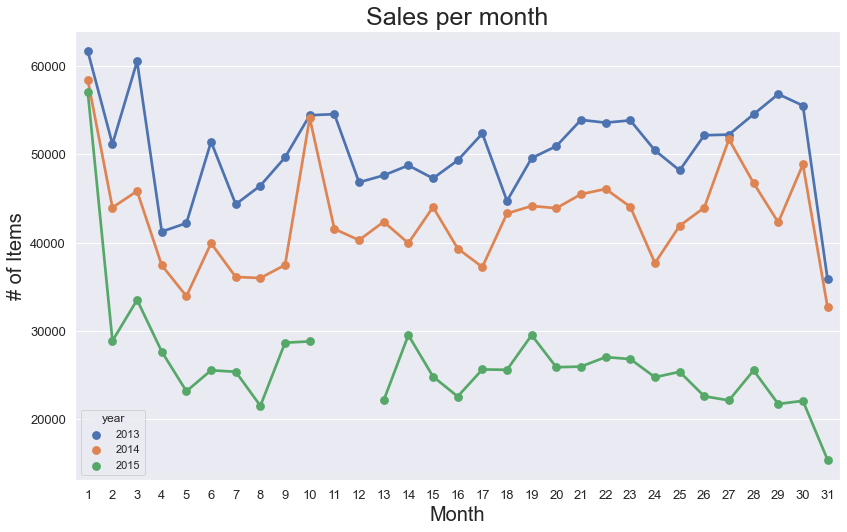

In [35]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data.groupby(['day', 'year'])['item_cnt_day'].sum().reset_index(), x='day', y='item_cnt_day', hue='year')

plt.title('Sales per month',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Month',fontsize=20)
plt.tick_params(labelsize=13)

In [64]:
df_tr_data[df_tr_data['year']==2015].day.value_counts()

1     44442
3     28970
2     25157
4     23435
9     22257
7     22155
6     21911
10    21446
23    21359
21    21207
22    21085
17    20946
18    20934
24    20651
25    20434
5     20068
14    19923
20    19922
19    19724
28    19255
8     19193
15    18924
16    18520
26    18292
27    18277
13    17899
30    16580
29    16370
31    13090
Name: day, dtype: int64

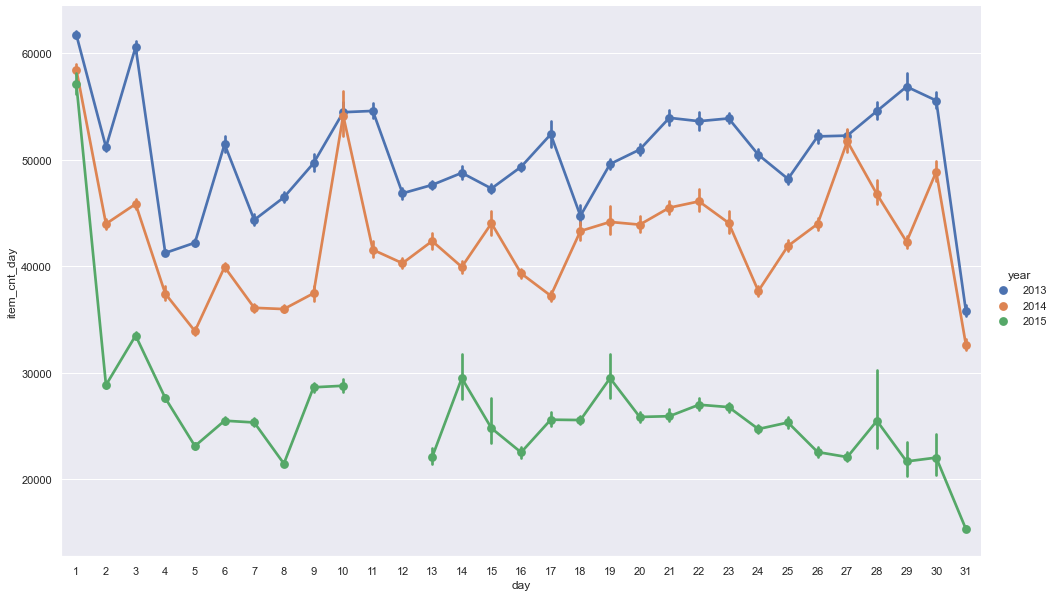

In [57]:
# month_sale = df_tr_data.groupby(['month', 'year'])['item_cnt_day'].sum()
sns.catplot(x='day', y='item_cnt_day', hue='year', data=df_tr_data, estimator=sum, kind='point', height=8.27, aspect=13.7/8.27)

#sns.pointplot(data=df_tr_data.groupby(['day', 'year'])['item_cnt_day'].sum().reset_index(), x='day', y='item_cnt_day', hue='year')

In [37]:
temp = df_tr_data.groupby(['weekday', 'year'])['item_cnt_day'].sum().reset_index()
temp.head()

,weekday,year,item_cnt_day
0,Friday,2013,245333.0
1,Friday,2014,188516.0
2,Friday,2015,113515.0
3,Monday,2013,192900.0
4,Monday,2014,160851.0


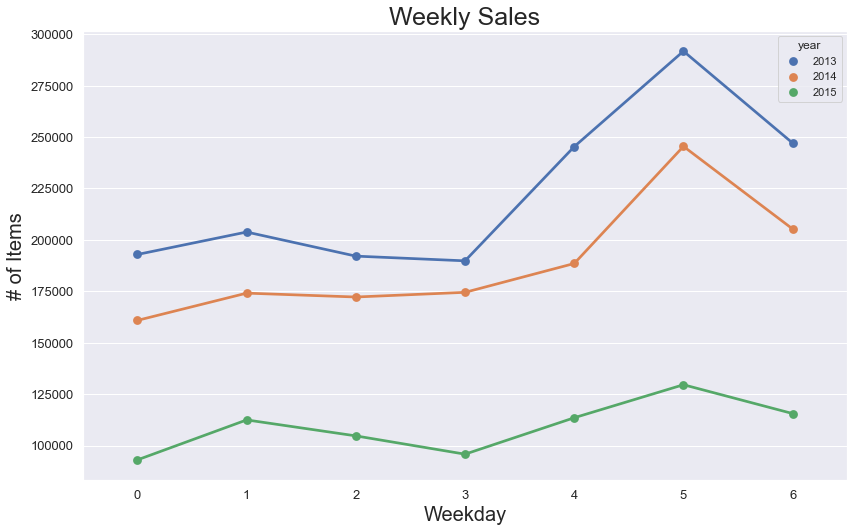

In [42]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data.groupby(['WEEKDAY', 'year'])['item_cnt_day'].sum().reset_index(), x='WEEKDAY', y='item_cnt_day', hue='year')

plt.title('Weekly Sales',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Weekday',fontsize=20)
plt.tick_params(labelsize=13)

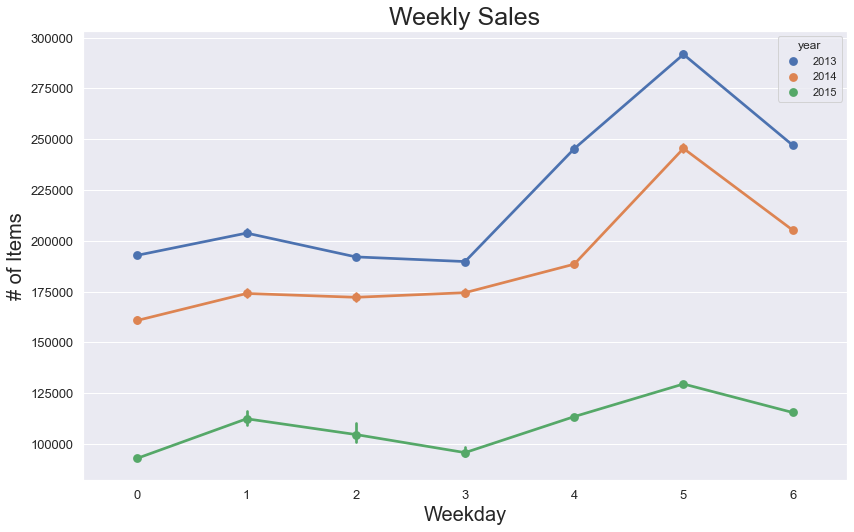

In [52]:
sns.set(rc={'figure.figsize':(13.7,8.27)})

sns.pointplot(data=df_tr_data, x='WEEKDAY', y='item_cnt_day', hue='year', estimator = sum)

plt.title('Weekly Sales',fontsize=25)
plt.ylabel('# of Items',fontsize=20)
plt.xlabel('Weekday',fontsize=20)
plt.tick_params(labelsize=13)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


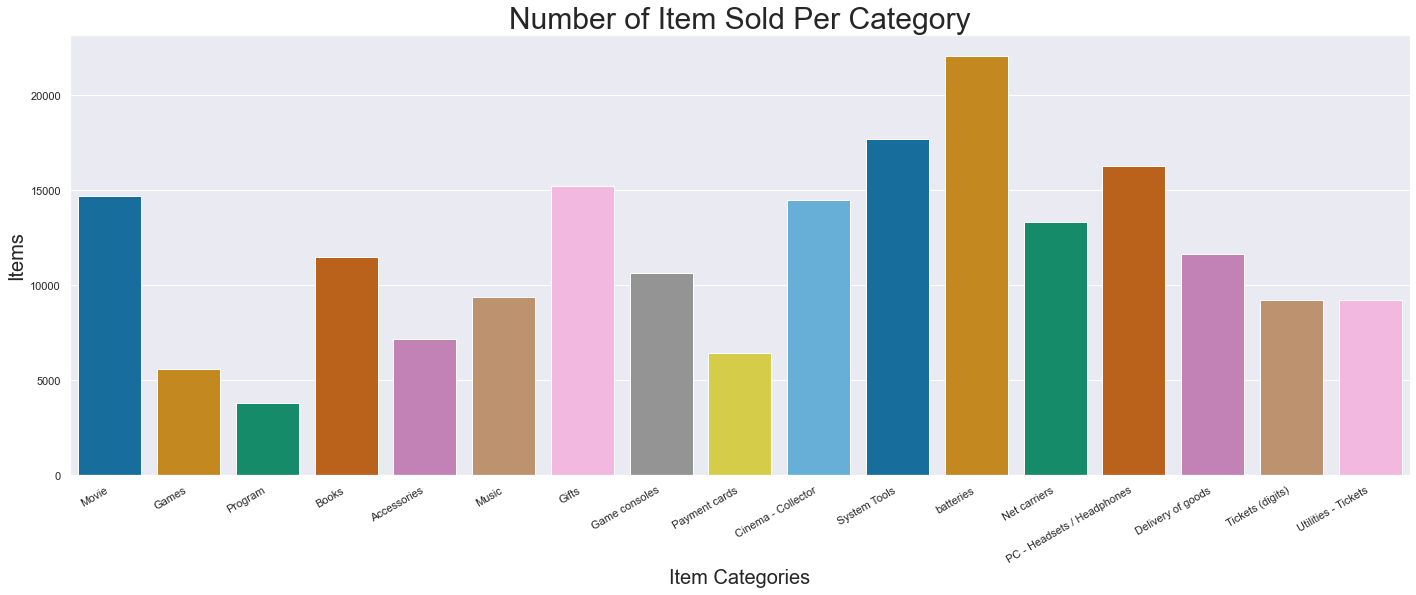

In [54]:
plt.rcParams['figure.figsize'] = (24, 9)
sns.barplot(df_tr_data['item_cat'], df_tr_data['item_id'], palette = 'colorblind', ci=None)
plt.title('Number of Item Sold Per Category', fontsize = 30)
plt.xlabel('Item Categories', fontsize = 20)
plt.ylabel('Items', fontsize = 20)

plt.gcf().autofmt_xdate() # x-axis labels with angle 

plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


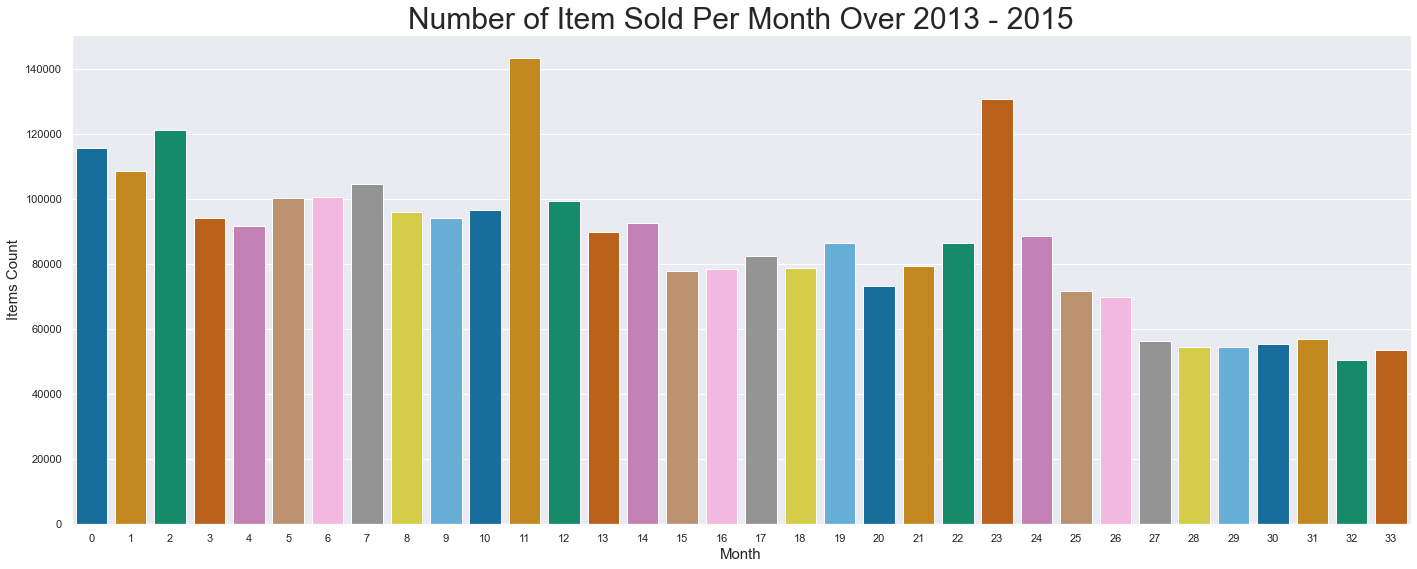

In [35]:
#plt.rcParams['figure.figsize'] = (24, 9)
sns.countplot(df_tr_data['date_block_num'], palette = 'colorblind')
plt.title('Number of Item Sold Per Month Over 2013 - 2015', fontsize = 30)
plt.xlabel('Month', fontsize = 15)
plt.ylabel('Items Count', fontsize = 15)
plt.show()

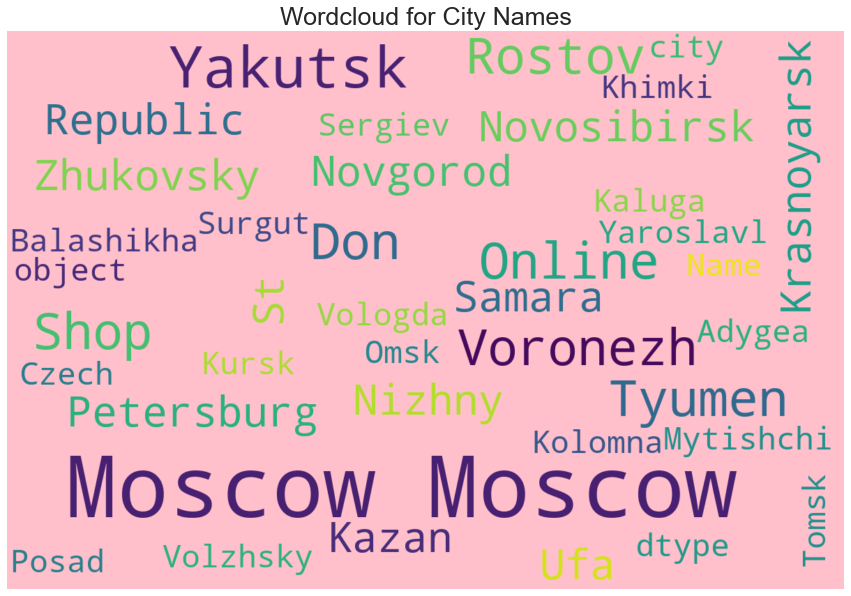

In [55]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

plt.rcParams['figure.figsize'] = (15, 12)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'pink',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_sh['city']))


plt.title('Wordcloud for City Names', fontsize = 25)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

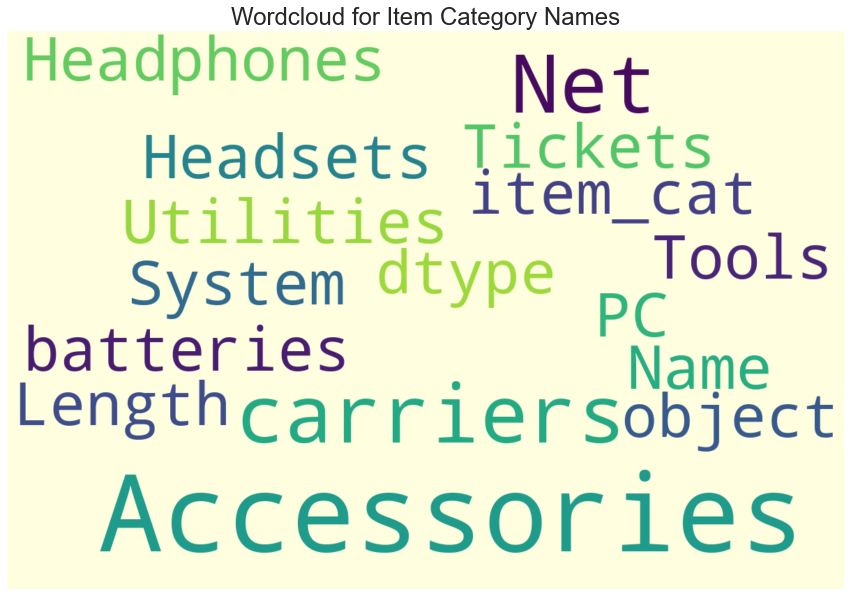

In [56]:
stopwords = set(STOPWORDS)
wordcloud = WordCloud(background_color = 'lightyellow',
                      max_words = 200, 
                      stopwords = stopwords,
                     width = 1200,
                     height = 800,
                     random_state = 42).generate(str(df_itm_cat['item_cat']))


plt.title('Wordcloud for Item Category Names', fontsize = 24)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

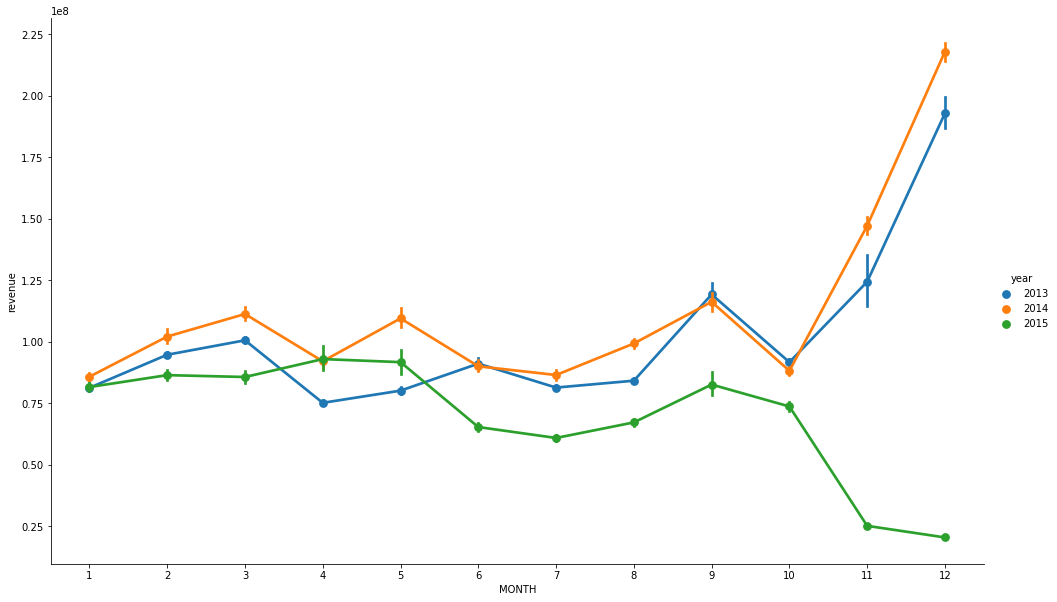

In [26]:
# month_sale = df_tr_data.groupby(['month', 'year'])['item_cnt_day'].sum()
sns.catplot(x='MONTH', y='revenue', hue='year', data=df_tr_data, estimator=sum, kind='point', height=8.27, aspect=13.7/8.27)